# **Retail Sales Data Analysis**

## Objectives

* My objective is to analyse the retail dataset from kaggle in order to identify trends, insights and the impact of promotional markdown on sales.

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [814]:
import os
current_dir = os.getcwd()
current_dir

'/'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [815]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [816]:
current_dir = os.getcwd()
current_dir

'/'

# Section 1

Section 1 content

In [817]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

sales = pd.read_csv("/workspace/hackathon-1/sales_data_set.csv")
sales


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


# Section 2

Section 2 content

In [818]:
df2 = sales.copy() # making a copy of the first dataset

In [819]:
sales.isnull().sum() # checking for any missing values

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [820]:
stores = pd.read_csv("/workspace/hackathon-1/stores_data_set.csv")
stores.head()
# checking the first 5 rows

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [821]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [822]:
features = pd.read_csv("/workspace/hackathon-1/Features_data_set.csv")
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [823]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [824]:
print(features.isnull().mean())

Store           0.000000
Date            0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.507692
MarkDown2       0.643346
MarkDown3       0.558852
MarkDown4       0.577045
MarkDown5       0.505495
CPI             0.071429
Unemployment    0.071429
IsHoliday       0.000000
dtype: float64


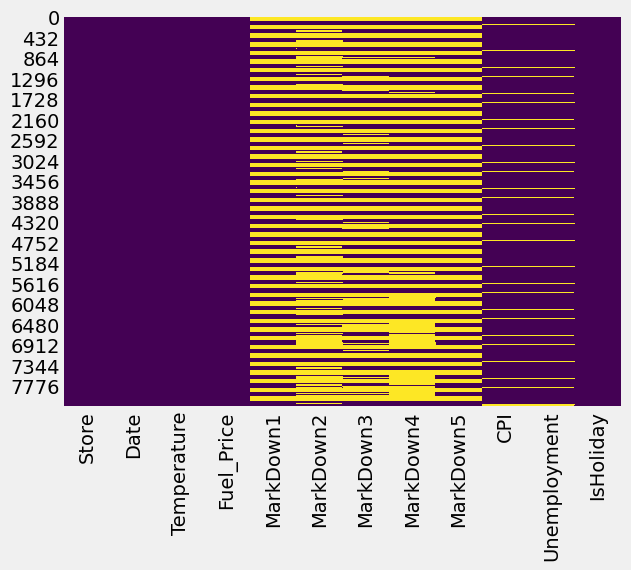

In [825]:
sns.heatmap(features.isnull(), cbar=False, cmap="viridis")
plt.show()
# using a graph to show the missing values

In [826]:
features['Date'] = pd.to_datetime(features['Date'], format='%d/%m/%Y')
# Converted 'date' column to date and time format

In [827]:
features['CPI'] = features['CPI'].interpolate(method='linear', limit_direction='both')
features['Unemployment'] = features['Unemployment'].interpolate(method='linear', limit_direction='both')
# handling missing values with linear interpolation

In [828]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in markdown_cols:
    features[col].fillna(features[col].mean(), inplace=True)

# replacing missing values with 'mean'

In [829]:
print("Missing Values Summary After Cleaning:")
print(features.isnull().sum())

# 3rd dataset has no missing values from now

Missing Values Summary After Cleaning:
Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


In [830]:
features.to_csv("/workspace/hackathon-1/Cleaned_Features_data_set.csv", index=False)

# saved the cleaned dataset

In [831]:
duplicates = features.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

#checked for duplicates and there are none for all 3 datasets

Number of duplicate rows: 0


In [832]:
print(sales.columns)
sales.columns = sales.columns.str.strip()

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


In [833]:
print(stores.columns)
stores.columns = stores.columns.str.strip()

Index(['Store', 'Type', 'Size'], dtype='object')


In [834]:
print(sales.dtypes)

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object


In [835]:
cleaned_features = pd.read_csv("/workspace/hackathon-1/Cleaned_Features_data_set.csv")
print(cleaned_features.dtypes)

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object


In [836]:
print(stores.dtypes)

Store     int64
Type     object
Size      int64
dtype: object


In [837]:
stores['Type'] = stores['Type'].astype('category')
print(stores.dtypes)
# changed 'type' to a category

Store       int64
Type     category
Size        int64
dtype: object


In [838]:
sales.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [839]:
sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')
sales.dtypes
# changed 'date' to date and time

/workspace/.pip-modules/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19/02/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/workspace/.pip-modules/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26/02/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/workspace/.pip-modules/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19/03/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/workspace/.pip-modules/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26/03/2010' in DD/MM/Y

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [840]:
cleaned_features['Date'] = pd.to_datetime(cleaned_features['Date'], errors='coerce')
cleaned_features.dtypes
#also converted 'date' into date and time

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object

In [841]:
merged_sales_features = pd.merge(sales, cleaned_features, on=['Store', 'Date'], how= 'inner' )
final_merge = pd.merge(merged_sales_features, stores, on='Store', how= 'inner')
final_merge.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-19,41595.55,False,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,False,A,151315
1,1,2,2010-02-19,47928.89,False,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,False,A,151315
2,1,3,2010-02-19,11523.47,False,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,False,A,151315
3,1,4,2010-02-19,36826.95,False,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,False,A,151315
4,1,5,2010-02-19,26468.27,False,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,False,A,151315


Under here, is a small graph detailing how weekly sales are weekly by each store

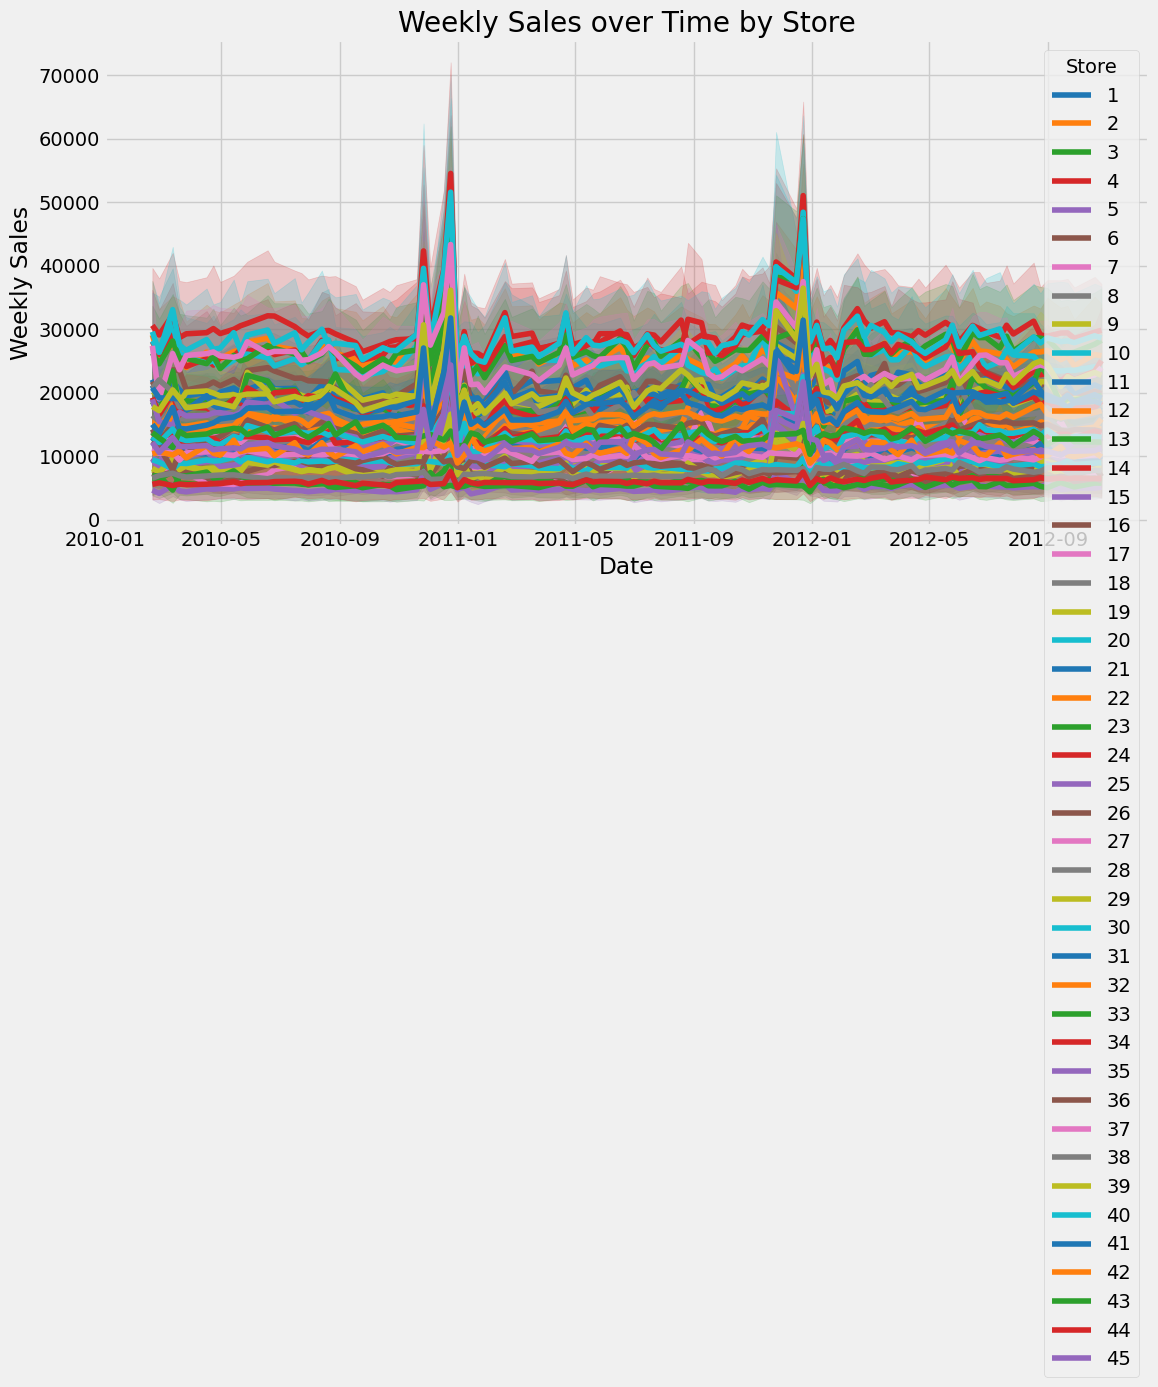

In [842]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_merge, x='Date', y='Weekly_Sales', hue='Store', palette='tab10')
plt.title('Weekly Sales over Time by Store')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()
# basic data visualisation to show how weekly sales are over time by each store


Just above, this is further evidence that sales increased drastically during the holiday periods, specifically between November-January of a year, and we can prove this as sales peaked at November 2010-January 2011, and again at Novemeber 2011-January 2012. I can predict from this graph that the weekly sales will always rise leading up to the Christmas holiday times and this ccan occur between Novemeber-January of a year.

Under here is plotting the variables present in the merged dataframes to see some basic data

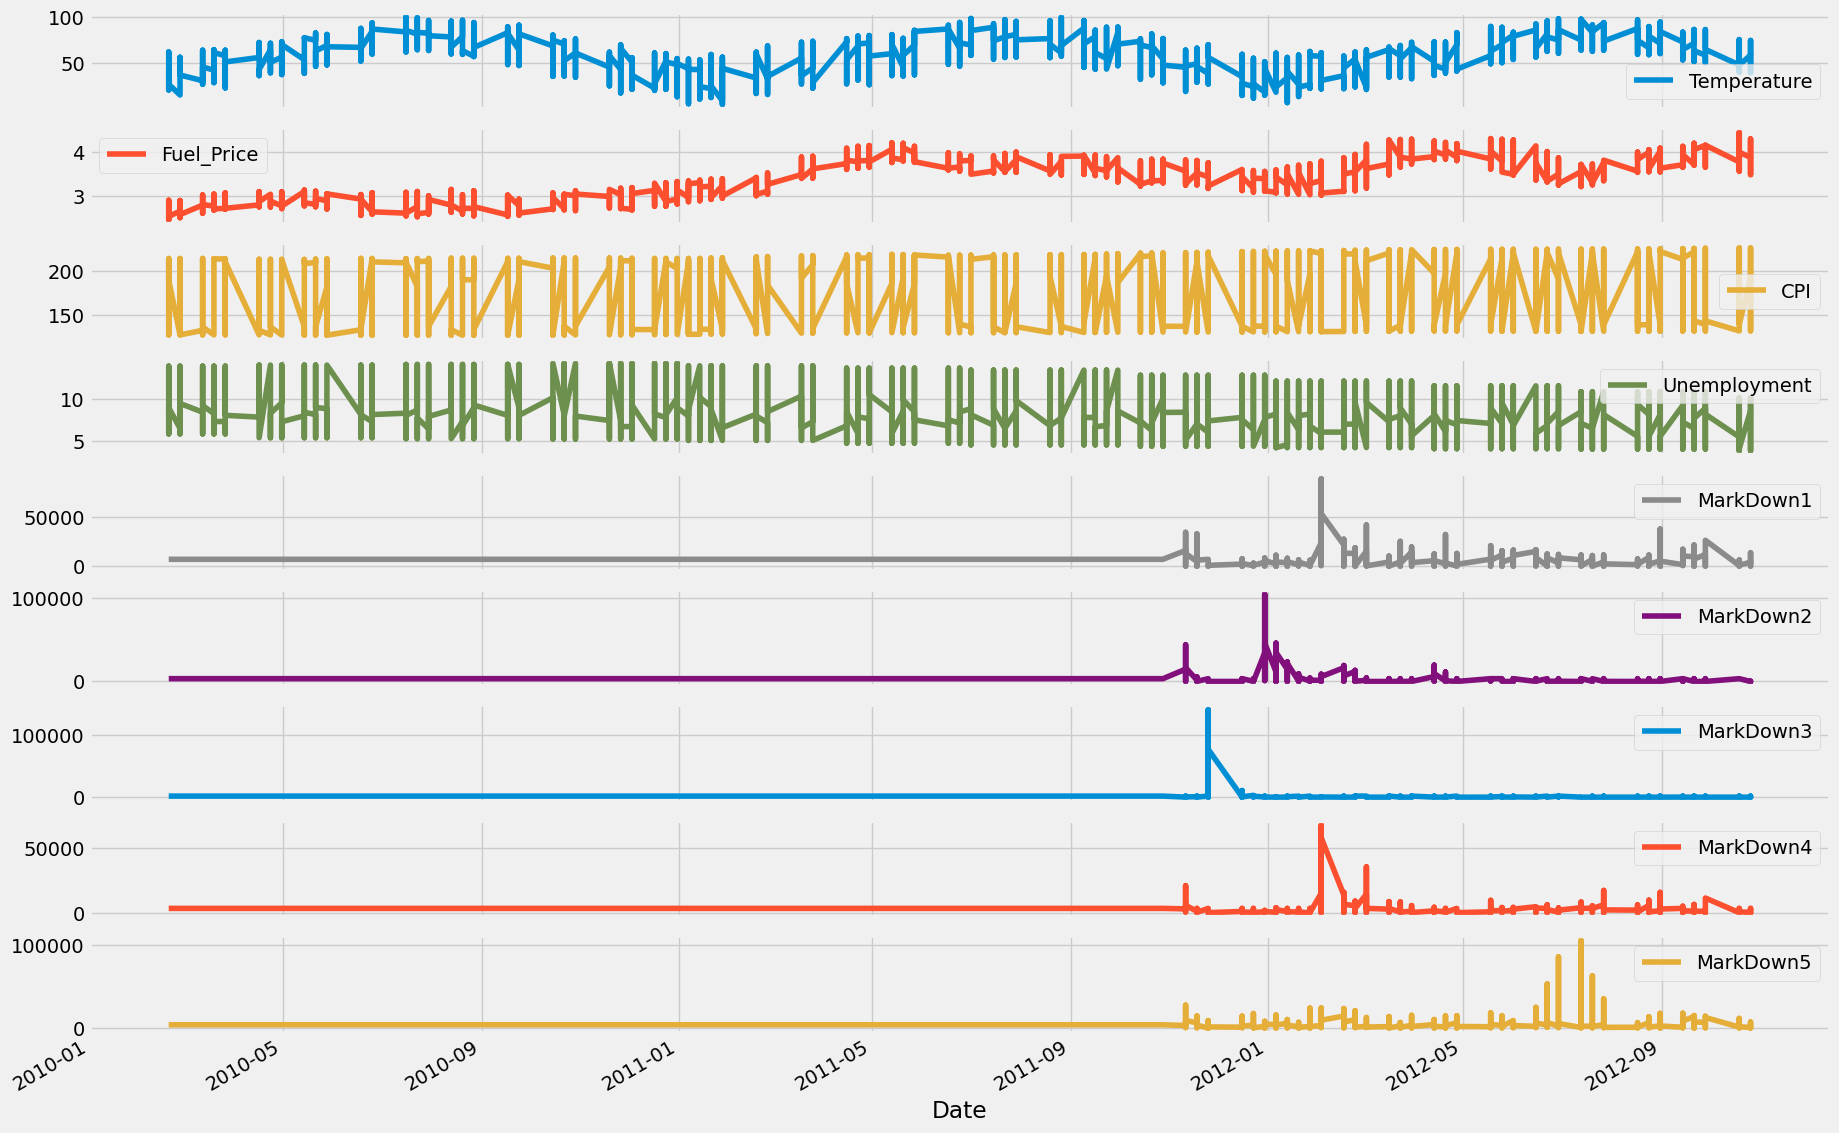

In [843]:
final_merge[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,15))
plt.show()

From this, we can that most Markdowns had little to no growth but had their individual peaks at seperate times, as Markdown 1 peaked around March 2012, whereas Markdown 2 had its peak around February 2012, and Markdown 3 at January 2012; Markdown 4 had its peak around March 2012, with the same time as Markdown 1 and Markdown 5's peak was near the second half of the year, more specifically July-August of 2012.

In [844]:
print(final_merge.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')


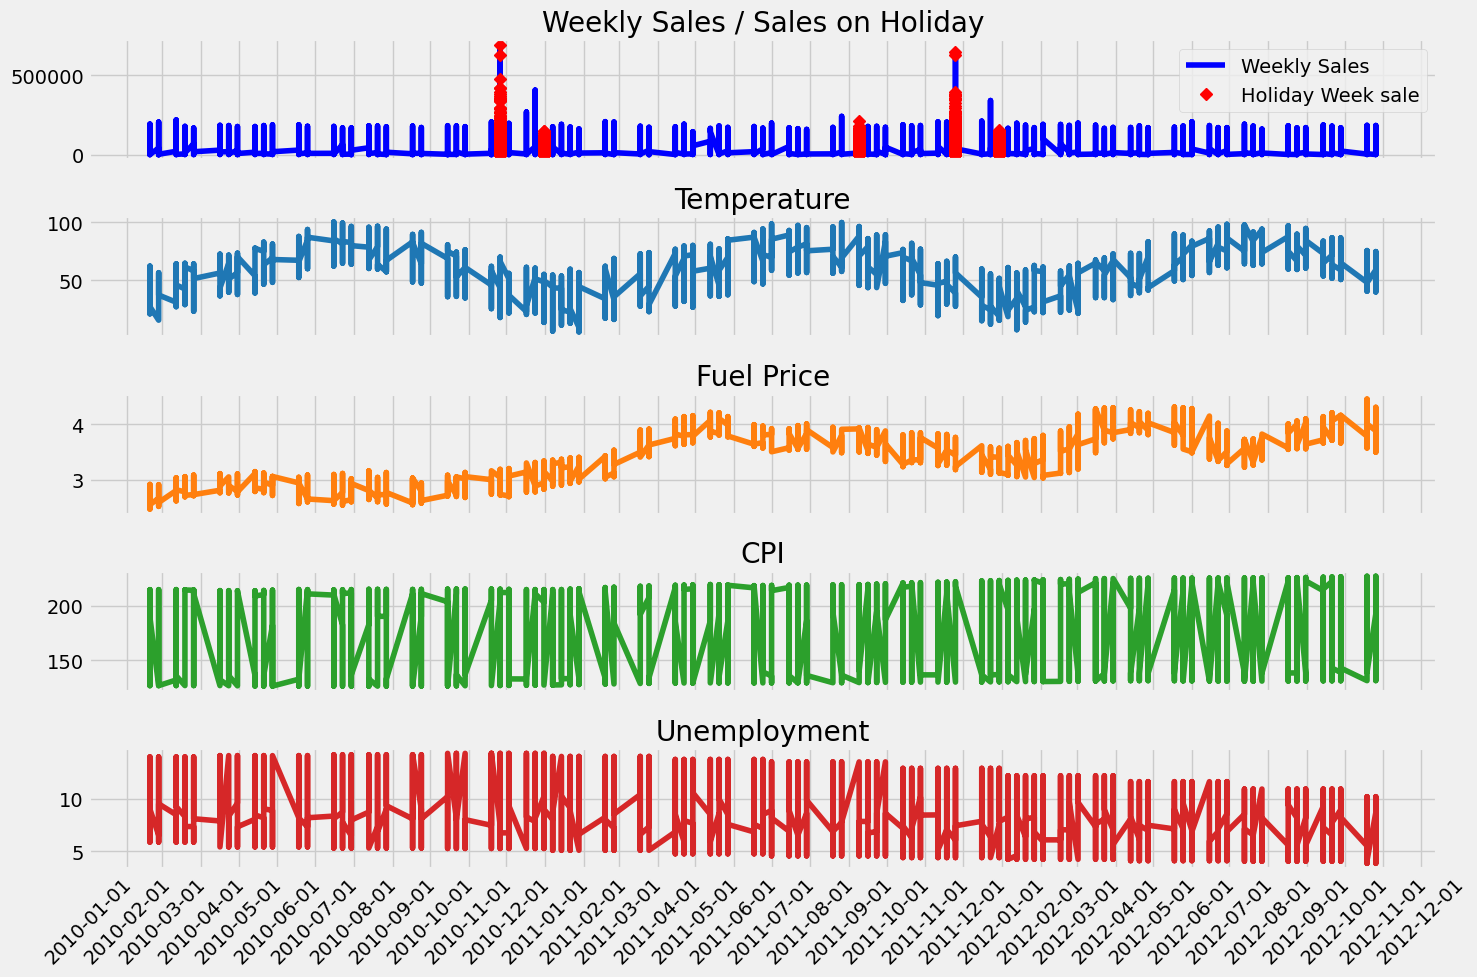

In [845]:
final_merge['Date'] = pd.to_datetime(final_merge['Date'])
final_merge.set_index('Date', inplace=True)

# Sort the data by date to ensure chronological order
final_merge.sort_index(inplace=True)

final_merge_subset = final_merge.loc[final_merge.index < pd.to_datetime('2015-03-01')]
fig, ax = plt.subplots(5, 1, figsize=(15, 10), sharex=True)
ax[0].plot(final_merge_subset.index, final_merge_subset["Weekly_Sales"], label="Weekly Sales", color="b")

# Plot sales on holiday weeks using 'IsHoliday_x'
ax[0].plot(final_merge_subset[final_merge_subset['IsHoliday_x'] == True].index, 
           final_merge_subset[final_merge_subset['IsHoliday_x'] == True]["Weekly_Sales"], 
           'D', label="Holiday Week sale", color="r")

ax[0].set_title("Weekly Sales / Sales on Holiday")
ax[0].legend()
ax[1].plot(final_merge_subset.index, final_merge_subset["Temperature"], label="Temperature", color='tab:blue')
ax[1].set_title("Temperature")
ax[2].plot(final_merge_subset.index, final_merge_subset["Fuel_Price"], label="Fuel Price", color='tab:orange')
ax[2].set_title("Fuel Price")
ax[3].plot(final_merge_subset.index, final_merge_subset["CPI"], label="CPI", color='tab:green')
ax[3].set_title("CPI")
ax[4].plot(final_merge_subset.index, final_merge_subset["Unemployment"], label="Unemployment", color='tab:red')
ax[4].set_title("Unemployment")
plt.xticks(rotation=45)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
ax[0].xaxis.set_major_locator(mdates.MonthLocator())  

plt.tight_layout()
plt.show()

      

Due to how large the dataset is, this is from 2010-2012, and from this we can see that weekly sales peaked during holiday periods specifically, Novemeber-December 2010, and November-December 2011. It also had some small rises in Januray 2011, and January 2012. From this data, we can distinguish the relationship between Weekly sales during the Christmas periods as it peaks highly due to the holiday's nature of gifts and purchases.

From this data, we also have an anomaly on Weekly Sales at September 2011, as there was a small climb during that month for the Holiday week sale, as it sold from the numbers that we can estimate up to 10,000 in that month and this shows that nearby the holidays approaching, that sales begin to pick up gradually.

Fuel price shows steady growth over the years, Temperature shows that it peaks at Summer at lowers during Winter, when it is really cold.

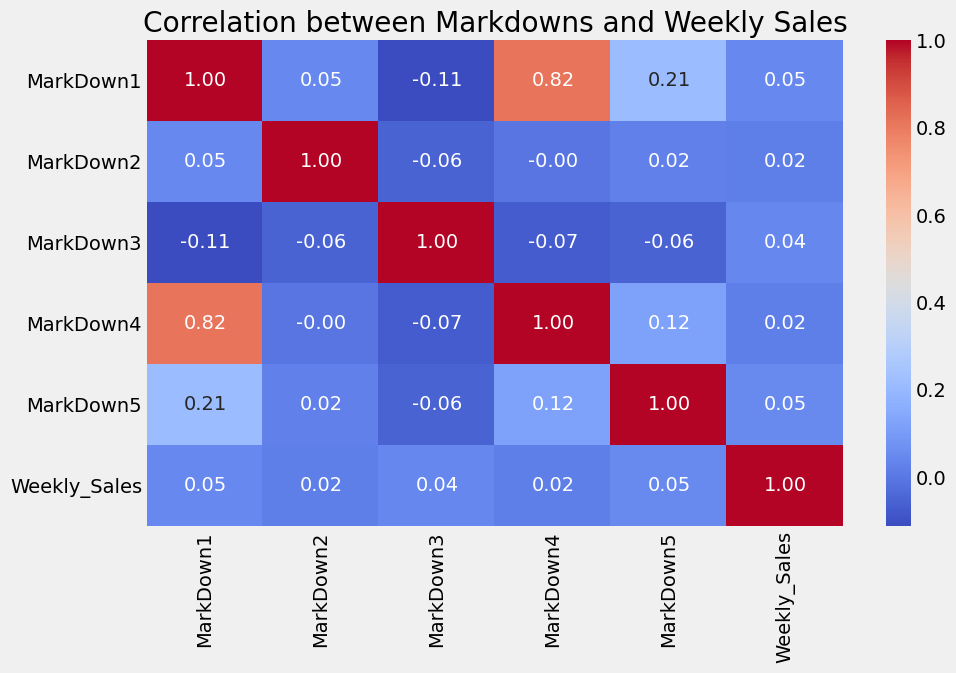

In [846]:
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
markdown_sales_corr = final_merge[markdown_columns + ['Weekly_Sales']].corr()

# Visualize the correlation between markdowns and sales
plt.figure(figsize=(10, 6))
sns.heatmap(markdown_sales_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between Markdowns and Weekly Sales")
plt.show()


From this, we can see that there is no correlation to when each Markdown promotion is assigned, however we can see that we have 2 anomalys, both of them between Markdown 4 to Markdown 1, and this can suggest that the Markdown promotions are working and this is leading to higher sales output. From the other graphs, we can imply that the Markdowns are in full effect during the winter period only; this could be because it is not being applied effectively during the other holidays, as consistent Markdowns can suggest that an item is not in demand.

But if it only peaks during winter, why is that? This could be due to many variables, one of them being that most people go gift shopping during winter for Christmas, which will always lead to higher sales output during that time period. Another variable can be the new year coming up, as this period of time can encourage people to go shopping due to the calendar year moving forwards.

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [847]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block (553063055.py, line 5)